### Gradient boosting: 

- Gradient boosting is a machine learning technique used in regression and classification tasks, among others. 

- It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees.

- When a decision tree is the weak learner, the resulting algorithm is called gradient-boosted trees; it usually outperforms random forest.


- A gradient-boosted trees model is built in a stage-wise fashion as in other boosting methods, but it generalizes the other methods by allowing optimization of an arbitrary differentiable loss function.

## Bagging : 
    
    Base learners      +    row sampling     + aggregation 
    [high variance]        column sampling
    [low bias]              [reduce variance]
    
    .
    .
    
    
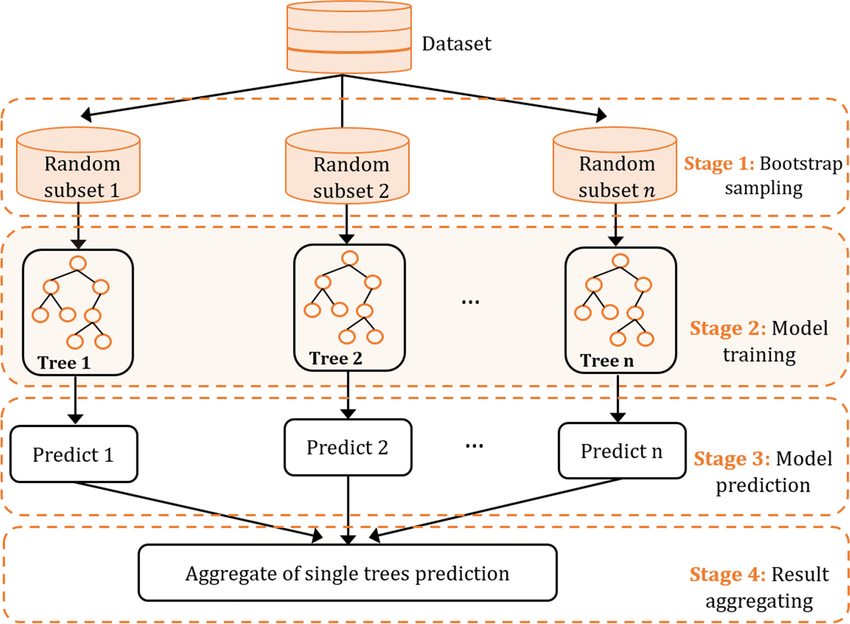

    .
    .
---------------------------------------------------------------
---------------------------------------------------------------
---------------------------------------------------------------

## Boosting : 





    base learners      +   additive combine 
    [high BIAS]          ( reduce the bias 
    [low Variance]           keeping variance low)
  
    (underfit)
    
    
    - Adaptive boosting (Adaboost)
    - Gradient Boosting
    - XGboost
    

    

### GBDT : Gradient Boost Decision Tree : 

    - learning is sequancial in GBDT. 
    

    When base learners : Decision trees with samll depth : 
    core idea : reduce the bias , keeping variance low. 
    
    - regression and classification we can do both . 

    bagging : base learners are : high variance  + low bias
    boosting :                    high bias + low variance models. 

        in bagging : idea is to reduce variance  keeping bias low. 
            in bossting : reduce bias, keeping variance low. 

### steps :     
    
                task regression : 
    
            Dtrain : { X(i),y(i) }i = 1 to n : 


    step0 :       step A:       Dtrain : with whole data :
                                 create a model M0.
                                 with high bias, low variance : 
                                 with depth_max = 1 or 2 
                                 (decision stump)
                           (in this case , we will predict average of y)
                       
                              F0 = y^ = h0(x)   (average model)
                                                  (very large training model)
                                                  
                 Step B : we find residuals from previous prediction (y-bar)
                             
                             errors(i) = y(i) - y^(i)   (difference only)
                             
           for each data points 
           now we have 
               {x(i),y(i) and error(i)} i = 1 to n 
        
        
    step 1 : 
    
                Now we create the first model , that can predict the errors which model 0 was making. 
                
                {X(i) , error(i)}   --- > M1 model with low depth 
                 input    output         h1(x)
                 
                 M1 = h1(x)
         
         
         
         F1(x) = ModelS at the end of stage 1 
                 
         
         F1(X) =   h0(x)   +  l *  h1(x)
                 (average     (first)
                  model)       model 
                               with some  
                               weight lambda l
                         
    step 2 : 
    
        another model which will predict the errors of the mnodel 1 .
        
            {X(i) , error(i)}
                      (errors that F1(x) model-1 was making)
                         y(i) - prediction from Model-1
                           y(i)-F1(x(i))  

                  
                 still there will be some gap between 
                 actual and previous error.
                 that gap model-2 will predict.
                 
                 
                  
         F2(X) =   h0(x)   +  l *  h1(x)    +   l * h2(x)
                 (average     (first)           2nd model with some weight
                  model)       model 
                               with some  
                               weight 



            .
            .
            .
            .
            
            we keep doing this till the error is minimised . 
            
       Fm(X)      = h0(x) + l1*h1(X) +  l2*h2(X) + . . . + lm hm(X)
       (final model of boosting)
       
       
       we are keep reducing the errors till we reach close to the actual value. 


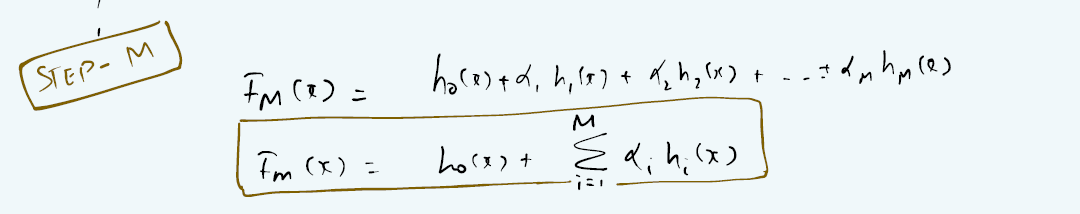

    .
    .
    .
    .
       
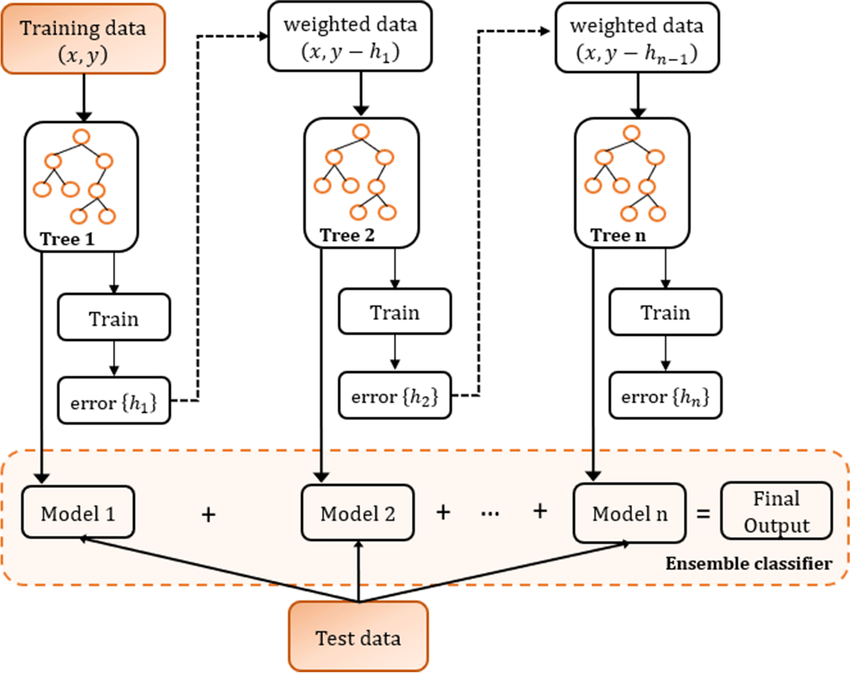       

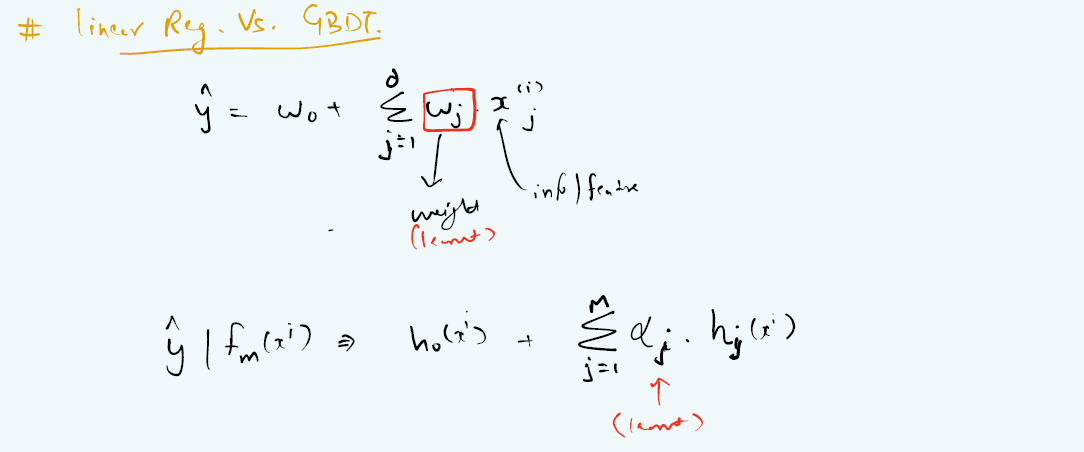

### Example: 

       LETS say a data point (Xnew) and output is 12.6
        and model 0 : average model predicts 7 .
        h0(Xnew) = 7
        
        error = 12.6-7 = 5.6
        
        model 1 , now instead of y , it will predict the previous error 5.6
        h1(Xnew) --> 5.6(suppose to predict)
        since this h1 model is also high bias model 
        it will make mistake and wont predict 5.6. 
        
        h1(Xnew) =  3.1 (predicted)
        
        F1(Xnew) = h0(Xnew) + l1 * h1(Xnew)
                 = 7 + 0.5*3.1
                      0.5 is l1 as some weightage
               
                 = 7+1.55 
                 = 8.55  (a step closer to 12.6)
                
        now        
        error = 12.6-8.55
              = 4.05
         
        now  goal of model2 to predict 4.05 error 
        
        F2(Xnew) = h0(Xnew) + l1*h1(Xnew) + l2*h2(Xnew)
                 =   7  +      0.5*3.1    + (0.6 * 2)
                 =  (        8.55       ) +     1.2
                 = 8.55+1.2
                 = 9.75
         
         Similarly the next model supports the previous model by additively combining models, by minimising the overall error and getting closer to actual y. 
                 
                      
        
        

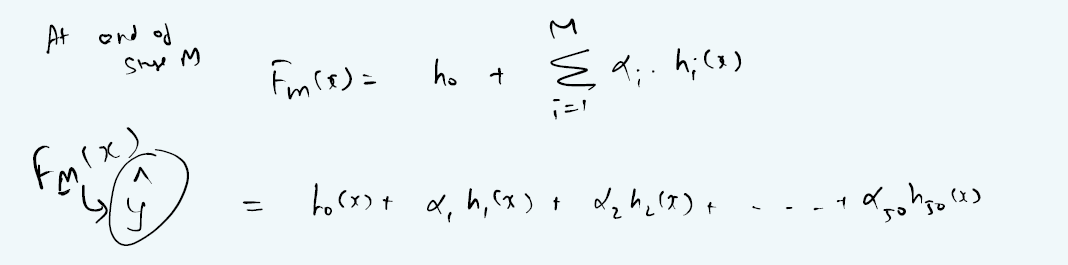

        - every step model , is trying to cover up  the previous mistakes.
        (sequential )

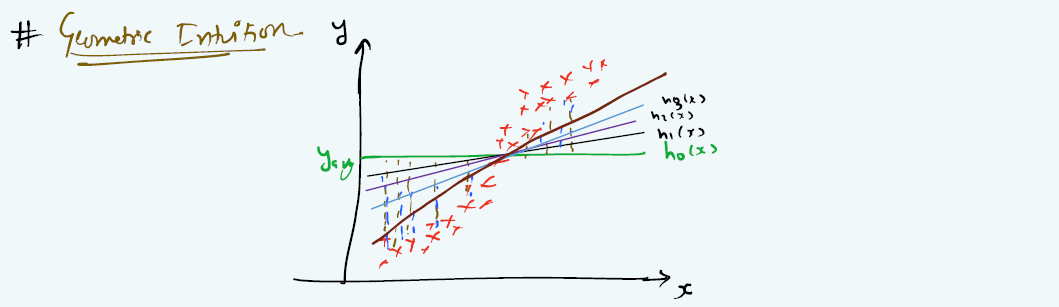

### hat we are learning : 
     all the alpha (weights of all models(of base learners))
     + 
     base decision tree learners. 
     
     
     

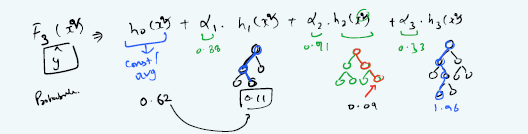

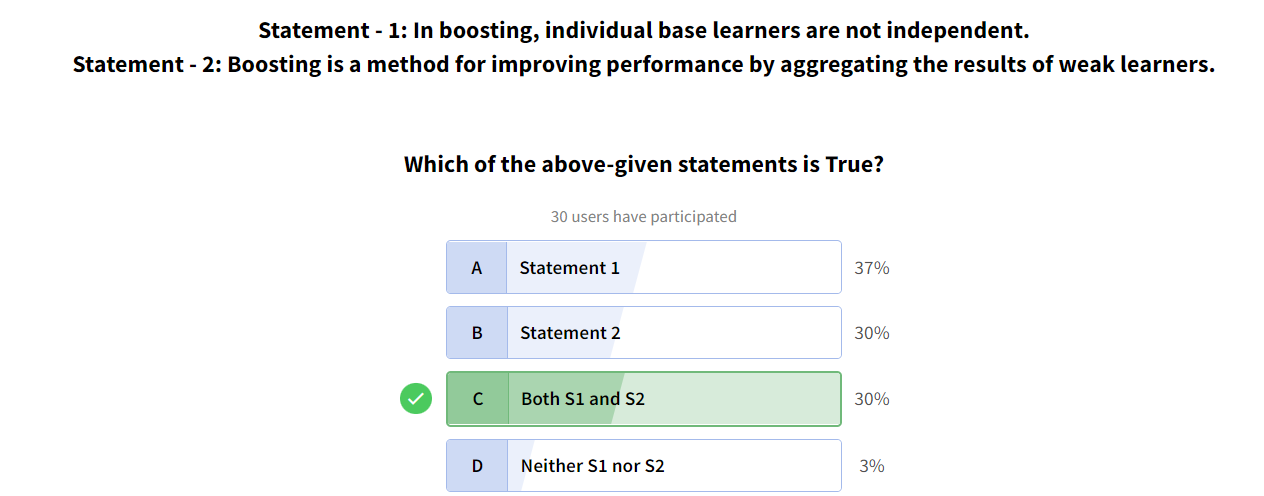

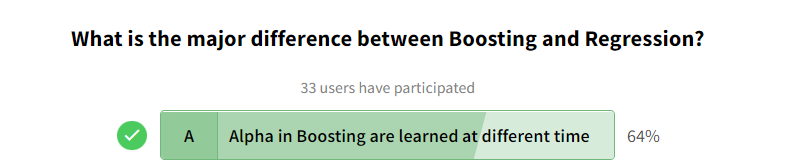

## Residuals , Pseudo Residuals and Loss function : 

    Trained
    final       Fk(X) = h0(X) + a1*h1(x) + a2*h2(x) + ...  + ak*hk(x)
    model
    at the 
    end of 
    stage k : 
    
    
    Errors at the end of k stage : 
    
        Residuals/error(i) = y(i) - Fk(X(i))
        
    {X(i),error(i)}  use residuals to train Fk+1(X) model. 
    
    
    which loss function we can use : 
    
    Loss Function : 
        
        for every X(i) -- > y(i)
        
         --    Fk(X(i)) ~~ y^(i)  - predicted
         
         
         
         Loss function  L(y , y^):
        
        in case of regression problem, loss function will  be a squared loss : 
        
        L(y,y^)
        
        
            L(y(i), Fk(x(i))) = (y*(i) - Fk(X(i)))^2  (squared loss)
                     (y^(i))
         
                                 
                                 Fk(x(i)) = z(i)
         
                                 
                                 
                                 L = (y(i)-z(i))^2
                                 
                                 
         
         dL/dz(i) = 2 (y(i)-Z(i)) (dz(i)/dz(i))
         
                  = -2 (y(i)-z(i))
         - dL/dz(i) = 2 (y(i)-z(i))
                  
                  = 2 * residuals
                  
          -dL/dz(i) is call negative gradient
          
          
          negative gradient ~~ is approximately ~ pseudo residual
                                                 (not exactly = residual)

    assume the loss is different:"huber loss"
    
    
    
    at the jth model : 
    
      hj(x) <--- {X(i),error(i)}
                
                       error(i) = y(i) - Fj-1(X)
                       error(i) = residuals  
                       
                       error(i) ~~ pseudo  residual
                              
                              = - dL/
                                dFj-1(x)
                                
                                
              to generalised the errors , we use pseudo residuals
              instead of residuals(which only work for MSE)
              
              use this pseudo residuals to train the next model. 
              
              
              thus, GBDT is powerful hence it can work for any loss function.
              
           \
           
           
           
#### SUMMURISE : 
     
     at end of stage 'p' : 
     
     Fp(X)
     final 
     model at stage p : 
     
     Fp(X) = h0(X) + a1*h1(X) + a2*h2(X) + ...  + ap*hp(X)
     
           = Fp-1(X) + ap*hp(X)
           
           to train hp(X) : {X(i), error(i)}
                                 
                                   error(i) = -dL/
                                             dFp-1(X)
                                             
                                             
                                 error(i) = y(i) - Fp-1(X)       
                                 error(i) ~~ pseudo  residual
                              
                                          = - dL/
                                            dFp-1(x)


                       
                      
          
                  
                  
                  
                
                  
        
        
        

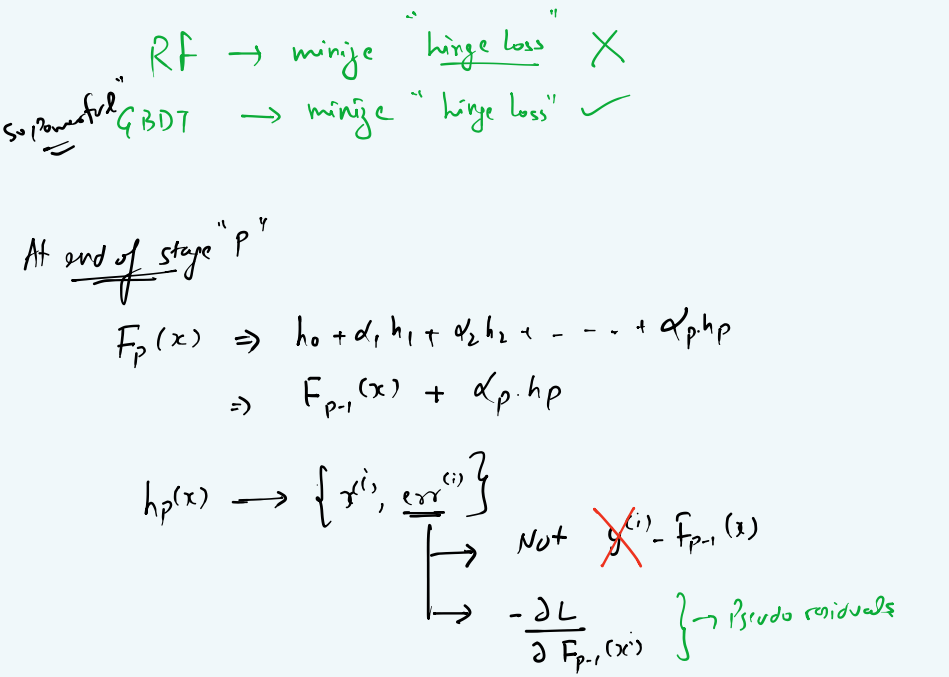

- Gradient boosting is a machine learning technique used in regression and classification tasks, among others. 
- It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees.
- When a decision tree is the weak learner, the resulting algorithm is called gradient-boosted trees; it usually outperforms random forest.


- `A gradient-boosted trees model is built in a stage-wise fashion as in other boosting methods, but it generalizes the other methods by allowing optimization of an arbitrary differentiable loss function.`

https://en.wikipedia.org/wiki/Gradient_boosting

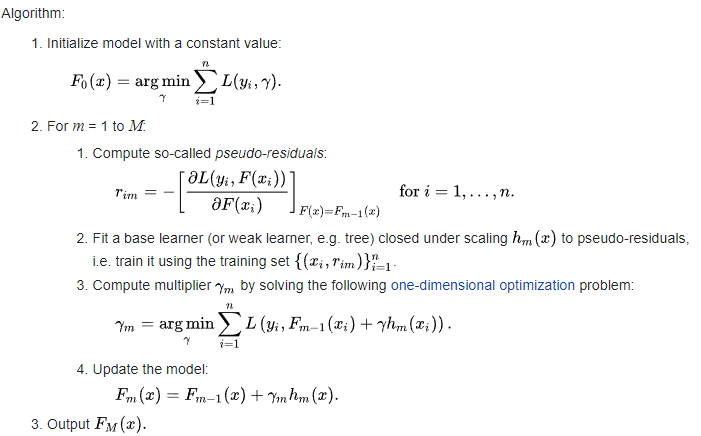

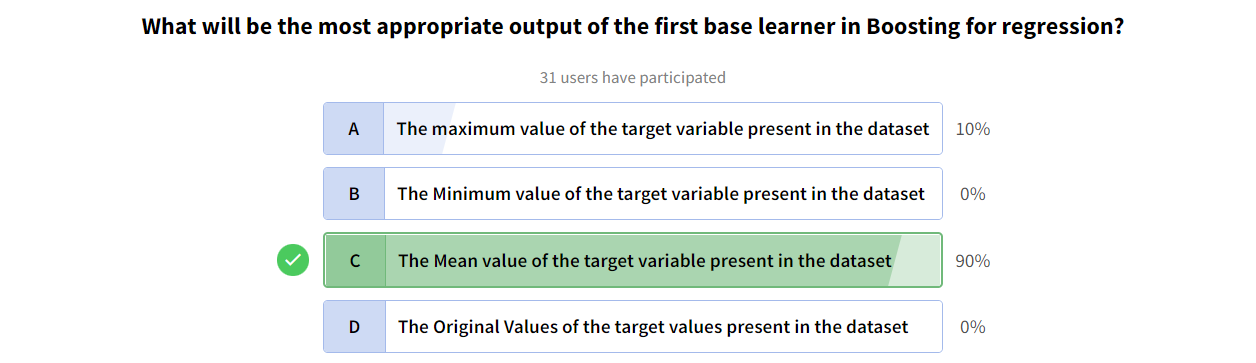

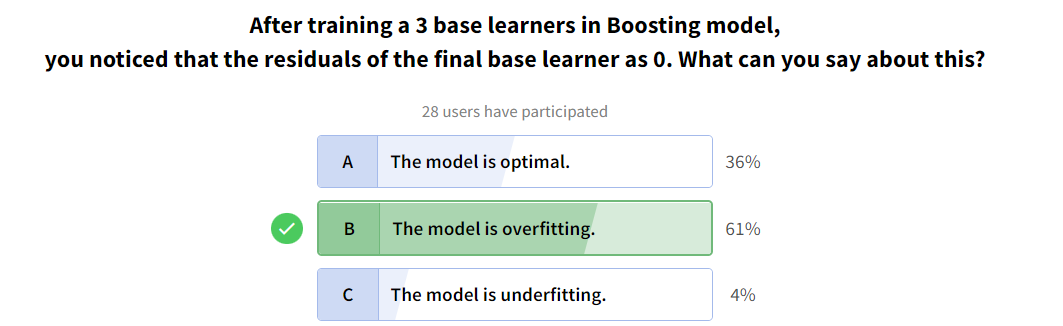

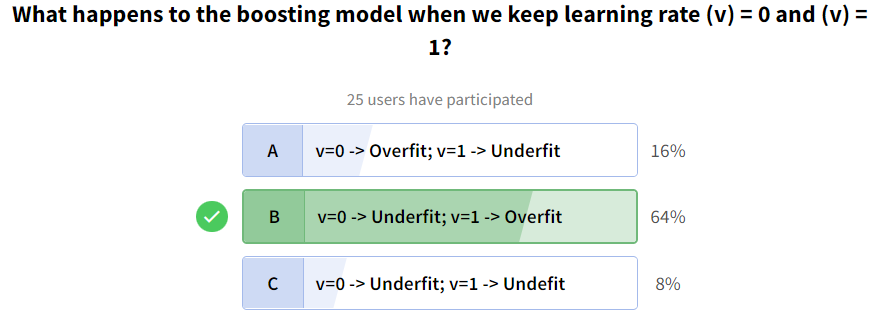

 ## Bias-Variance  : 
 
 
     Fm(X) = h0 + a1.h1(X) + a2.h2(X) + ... + am.hm(X)
     
     Find the best M ! (number of base learners )
     using Grid Search or CV. 
     
     As Number of base learners increases , overfitting 
             number of base learners are less, underfit. 
       

## Regularisation by Shrinkage : 

    Fm(X) = Fm-1(X) +    eta*    [gama_m * hm(X)]
                       Learning
                        rate
                        
- An important part of gradient boosting method is regularization by shrinkage which consists in modifying the update rule as follows:        



- where parameter 'nu'  is called the "learning rate".

- Empirically it has been found that using small learning rates (such as nu < 0.1) yields dramatic improvements in models' generalization ability over gradient boosting without shrinking (nu = 1).


- However, it comes at the price of increasing computational time both during training and querying: lower learning rate requires more iterations


    Learning rate is higher  : underfitiing
                     low         overfitting increases. 

In [1]:
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True, as_frame=True)

In [4]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

# LogisticRegression

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [7]:
lr.fit(X,y)
lr.score(X,y)

0.9733333333333334

# GradientBoostingClassifier

In [8]:
from sklearn.model_selection import cross_validate

GBDT_ = GradientBoostingClassifier(
    loss='log_loss',
    learning_rate=0.5,
    n_estimators=50,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_depth=3,
    min_impurity_decrease=0.0,
    init=None,
    random_state=None,
    max_features=None,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=0.0001,
    ccp_alpha=0.0,)

cv_acc_results = cross_validate(GBDT_, X, y, cv = 5,  return_train_score = True)
cv_acc_results

{'fit_time': array([0.09866166, 0.08616185, 0.05505991, 0.06941462, 0.07035327]),
 'score_time': array([0.00639915, 0.0019958 , 0.00200009, 0.00200796, 0.00199866]),
 'test_score': array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [9]:
print(f"K-Fold Accuracy Mean: Train: {cv_acc_results['train_score'].mean().round(3)*100} Validation: {cv_acc_results['test_score'].mean().round(3)*100}")


K-Fold Accuracy Mean: Train: 100.0 Validation: 95.3


In [10]:
GBDT_.fit(X,y)

GradientBoostingClassifier(learning_rate=0.5, n_estimators=50)

In [11]:
GBDT_.score(X,y)

1.0

### in GBDT : Bias-variance tradeoff :  
    
        number of base-learners M increases ---> overfit 
                                M less           underfit
                                
                          depth of base learners : 
                          depth increases --- overfit
                          shallow - --- underfit
                          
                    shrinkage : learning rate -->"nu"
                        nu increases : overfit
                        nu decreases : underfit
                        
                        
                       
                                 
                  

### Impact of outliers on GBDT : 
    
     as base learners increases , impact tends to reduced.
        
     
     yet have to be very careful , 
     
     --GBDT can easily overfit and hence proper hyperparamer tuning is required, by reducing shrinkage, depth of tree or number of base learners. 
        
        
    - use robust loss function : to reduce the impact of outliers. 
        
        

#### Huber loss
    In statistics, the Huber loss is a loss function used in robust regression, that is less sensitive to outliers in data than the squared error loss. A variant for classification is also sometimes used.
    
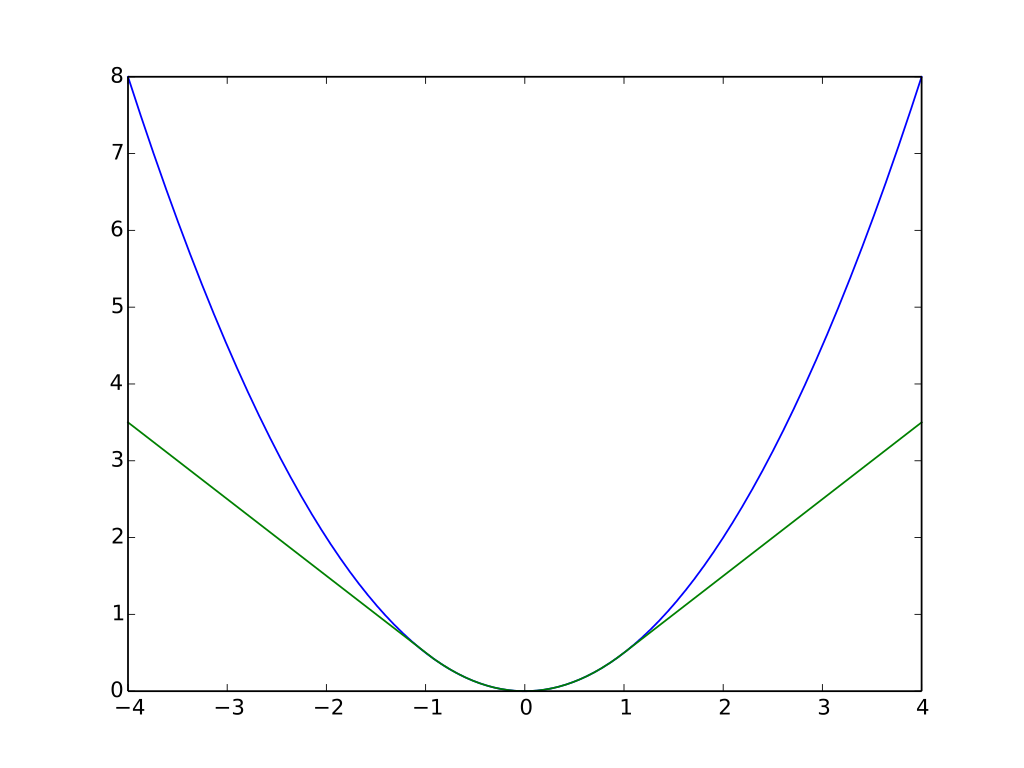
    
    

https://en.wikipedia.org/wiki/Huber_loss#/media/File:Huber_loss.svg

# Stochastic GBDT : 

    GBDT : "DT " + Pseudo Residual  + Additive combining 
    
    


    GBDT + Row-sampling 
         to reduce the variance
         (underfitting)   

    GBDT_ = GradientBoostingClassifier(
        loss='log_loss',
        learning_rate=0.5,
        n_estimators=50,
        subsample=1.0,                ------------> reduce the overfitting
        criterion='friedman_mse',
        min_samples_split=2,
        min_samples_leaf=1,
        min_weight_fraction_leaf=0.0,
        max_depth=3,
        min_impurity_decrease=0.0,
        init=None,
        random_state=None,
        max_features=None,
        verbose=0,
        max_leaf_nodes=None,
        warm_start=False,
        validation_fraction=0.1,
        n_iter_no_change=None,
        tol=0.0001,
        ccp_alpha=0.0,)

# XGBoost : 
### better implementation of GBDT : 

https://xgboost.readthedocs.io/en/stable/

    XGBoost : DT - pseudo residual + Row sampling + column sampling 
    
    
    fater model training 
    
    good parts of [Bagging + boosting]

https://xgboost.readthedocs.io/en/stable/python/python_api.html#module-xgboost.sklearn

In [12]:
import xgboost as xgb

In [41]:
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True, as_frame=True)

from xgboost import XGBClassifier

from sklearn.model_selection import cross_validate


In [48]:

xgb = XGBClassifier(n_estimators = 100,
                   max_depth  = 4,learning_rate  = 0.001)



In [49]:
cv_acc_results = cross_validate(xgb, X, y, cv = 5,  return_train_score = True)
cv_acc_results

{'fit_time': array([0.05400252, 0.04400969, 0.04300952, 0.04601026, 0.04300976]),
 'score_time': array([0.00300074, 0.00300074, 0.00300074, 0.00200033, 0.00300121]),
 'test_score': array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.98333333, 0.98333333, 0.99166667, 0.975     , 0.975     ])}

In [51]:
xgb.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.001, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto', ...)

In [52]:
xgb.score(X,y)

0.98

##### Ddocumentation  :  XGBoost_Classifier

https://xgboost.readthedocs.io/en/stable/python/python_api.html#module-xgboost.sklearn

In [54]:
xgb.feature_importances_

array([0.        , 0.        , 0.44659817, 0.5534019 ], dtype=float32)

# LightGBM : 
    - purpose : reduce the training time 

https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html

In [57]:
# !pip install lightgbm

In [58]:
import lightgbm as lgb

In [59]:
lgb.LGBMClassifier

lightgbm.sklearn.LGBMClassifier

In [60]:
lgb.LGBMRegressor

lightgbm.sklearn.LGBMRegressor

In [ ]:
## GOSS 
## Exclusive Feature Bundling


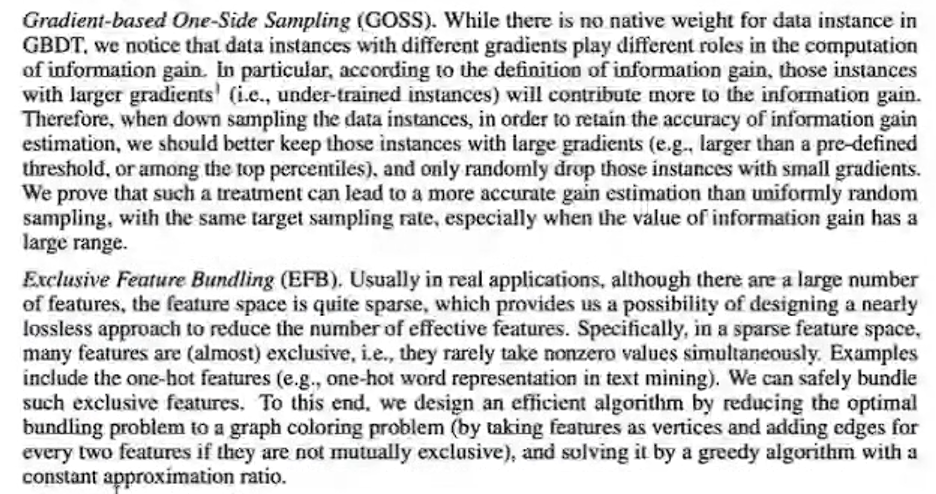

# Boosting vs Bagging :
  
      shallow tree           deep tree
      faster                 more time in prediction than boosting
      faster training        takes time in trainig
      
      
      

https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205

## CatBoost : 
    - unbiased boosting with categorical features . 

# Stacking : 

In [61]:
from sklearn.ensemble import StackingClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html